# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [18]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin-1')

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, ce

In [53]:
df.head(3)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [55]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [56]:
#Your code here

$H_0\text{: } \mu = \bar{x}$ Education has no impact on salary.

$H_a\text{: } \mu < \bar{x}$ A Masters degree increases salary.

A more specific hypothesis can be tested after we see if there is a viable p for this.


In [57]:
# dropna
df = df.dropna(subset=['FormalEducation', 'AdjustedCompensation'])

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

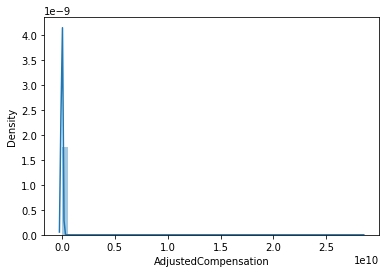

In [58]:
# explore outliers
sns.distplot(df['AdjustedCompensation'])

In [59]:
# what are teh outliers
df[(zscores > 3) | (zscores < -3)]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
5477,A different identity,United Kingdom,100.0,Employed full-time,NaN,NaN,Yes,NaN,Statistician,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282974,2.829740e+10


In [60]:
dfc = df[(zscores <= 3) & (zscores >= -3)]

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

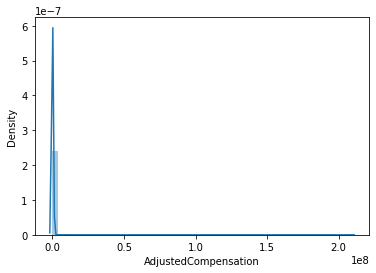

In [62]:
sns.distplot(dfc['AdjustedCompensation'])

    Hmm, that only removed one record.  Lets try the IQR method.

In [63]:
q1 = df['AdjustedCompensation'].quantile(.25)
q3 = df['AdjustedCompensation'].quantile(.75)
iqr = q3 - q1
lower_thresh = q1 - (1.5*iqr)
upper_thresh = q3 + (1.5*iqr)

# check what would be removed.
df[df['AdjustedCompensation'] > upper_thresh]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
75,Male,United States,40.0,Employed full-time,NaN,NaN,Yes,NaN,Scientist/Researcher,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,215000.0
197,Male,United States,50.0,Employed full-time,NaN,NaN,Yes,NaN,Scientist/Researcher,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,305000.0
201,Male,United States,72.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
338,Male,Australia,38.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,240693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23174,Male,Netherlands,37.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195826,298956.5
23249,Male,United States,57.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,300000.0
24355,Male,Other,52.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
25172,Male,United States,47.0,Employed full-time,NaN,NaN,Yes,NaN,Other,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,550000.0


/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

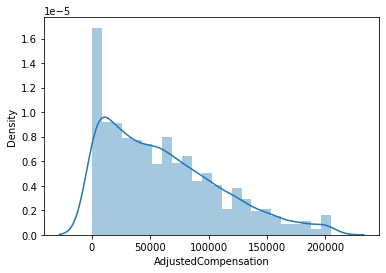

In [64]:
# make it so
dfc = dfc[dfc['AdjustedCompensation'] < upper_thresh]
dfc = dfc[dfc['AdjustedCompensation'] > lower_thresh]
sns.distplot(dfc['AdjustedCompensation'])

In [65]:
alpha = 0.05

a = df[df['FormalEducation'] == "Bachelor's degree"]
# a = a.dropna(subset=['AdjustedCompensation'])
b = df[df['FormalEducation'] == "Master's degree"]
# b = b.dropna(subset=['AdjustedCompensation'])

t = stats.ttest_ind(a['AdjustedCompensation'], b['AdjustedCompensation'], equal_var=False)

p = t.pvalue / 2

print(f'alpha: {alpha}, p: {p}')

alpha: 0.05, p: 0.33077639451272445


p is below alpha so we reject the null hypothesis.  The data does suggest that education has an impact on salary.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [66]:
df['FormalEducation'].value_counts()

Master's degree                                                      1990
Bachelor's degree                                                    1107
Doctoral degree                                                       967
Professional degree                                                   130
Some college/university study without earning a bachelor's degree     111
I did not complete any formal education past high school               30
I prefer not to answer                                                  7
Name: FormalEducation, dtype: int64

In [67]:
#Your code here

#With outliers
a = df[df['FormalEducation'] == "Bachelor's degree"]
b = df[df['FormalEducation'] == "Doctoral degree"]

t = stats.ttest_ind(a['AdjustedCompensation'], 
                    b['AdjustedCompensation'], 
                    equal_var=False)

print('P with outliers:', t.pvalue)

a = dfc[dfc['FormalEducation'] == "Bachelor's degree"]
b = dfc[dfc['FormalEducation'] == "Doctoral degree"]

t = stats.ttest_ind(a['AdjustedCompensation'], 
                    b['AdjustedCompensation'], 
                    equal_var=False)

print('P without outliers:', t.pvalue)

P with outliers: 0.31364763989440514
P without outliers: 1.0504536312055929e-33


Similarly with the outliers we fail to reject the $H_0$, but with the outliers removed we have a very low p indiciating a stong probability that education level does affect salary.

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [69]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [133]:
dfc2 = dfc.dropna(subset=['EmploymentStatus'])
formula = "AdjustedCompensation ~ C(FormalEducation), C(EmploymentStatus)"
lm = ols(formula, dfc2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: Error converting data to categorical: observation with value <patsy.categorical._CategoricalBox object at 0x7fe676027a00> does not match any of the expected levels (expected: [<patsy.categorical._CategoricalBox object at 0x7fe65d960940>, <patsy.categorical._CategoricalBox object at 0x7fe672d63490>])
    AdjustedCompensation ~ C(FormalEducation), C(EmploymentStatus)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [84]:
dfc[['index', 'AdjustedCompensation', 'FormalEducation']]

,index,AdjustedCompensation,FormalEducation
0,8,64184.800,Bachelor's degree
1,9,20882.400,Bachelor's degree
2,11,1483.900,Bachelor's degree
3,14,36634.400,Master's degree
4,21,20000.000,Bachelor's degree
...,...,...,...
4224,26185,50000.000,Bachelor's degree
4225,26195,100449.384,Bachelor's degree
4226,26203,200000.000,Doctoral degree
4227,26255,89686.950,Master's degree


In [98]:
dfc2 = dfc[['index', 'AdjustedCompensation', 'FormalEducation']]
dfc2

# dfc2.pivot_table(index = ['index', 'AdjustedCompensation'],
#                 columns = 'FormalEducation',
#                 values = 'FormalEducation',
#                 aggfunc = 'count')

,index,AdjustedCompensation,FormalEducation
0,8,64184.800,Bachelor's degree
1,9,20882.400,Bachelor's degree
2,11,1483.900,Bachelor's degree
3,14,36634.400,Master's degree
4,21,20000.000,Bachelor's degree
...,...,...,...
4224,26185,50000.000,Bachelor's degree
4225,26195,100449.384,Bachelor's degree
4226,26203,200000.000,Doctoral degree
4227,26255,89686.950,Master's degree


In [121]:
dfc = dfc.set_index(['index', 'AdjustedCompensation'])
dfc_dummies = pd.get_dummies(dfc['FormalEducation'], columns=['FormalEducation'])
dfc = dfc.reset_index()
dfc_dummies.columns = list('1234567')
dfc_dummies.reset_index(inplace=True)
dfc_dummies.head()

,index,AdjustedCompensation,1,2,3,4,5,6,7
0,8,64184.8,1,0,0,0,0,0,0
1,9,20882.4,1,0,0,0,0,0,0
2,11,1483.9,1,0,0,0,0,0,0
3,14,36634.4,0,0,0,0,1,0,0
4,21,20000.0,1,0,0,0,0,0,0


In [115]:
formula = """AdjustedCompensation ~ C(Bachelor\'s degree), C(Doctoral degree),
       C(I did not complete any formal education past high school),
       C(I prefer not to answer), C(Master\'s degree), C(Professional degree),
       C(Some college\/university study without earning a bachelor\'s degree)"""
lm = ols(formula, pivot).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: error tokenizing input (maybe an unclosed string?)
    AdjustedCompensation ~ C(Bachelor's degree), C(Doctoral degree),        C(I did not complete any formal education past high school),        C(I prefer not to answer), C(Master's degree), C(Professional degree),        C(Some college\/university study without earning a bachelor's degree)
                                                                                                                                                                                                                                            ^

In [127]:
levels = [0,1]
formula = "AdjustedCompensation ~ C(1, levels = levels),C(5, levels = levels)"
#        C(I did not complete any formal education past high school),
#        C(I prefer not to answer), C(Master\'s degree), C(Professional degree),
#        C(Some college\/university study without earning a bachelor\'s degree)"""
lm = ols(formula, dfc_dummies).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: Error converting data to categorical: observation with value <patsy.categorical._CategoricalBox object at 0x7fe676b69640> does not match any of the expected levels (expected: [<patsy.categorical._CategoricalBox object at 0x7fe672ae21f0>, <patsy.categorical._CategoricalBox object at 0x7fe672ae2e50>])
    AdjustedCompensation ~ C(1, levels = levels),C(5, levels = levels)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!